In [2]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
data = pd.read_csv('scopus.csv')

In [310]:
data.head(5)

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Document Type,Publication Stage,Open Access,Source,EID
0,"Han, G.-S., Li, Q., Li, Y.",35722113100; 57230992800; 57221627250,Nucleosome positioning based on DNA sequence e...,2022,BMC Genomics,23,NaN,301,NaN,NaN,NaN,NaN,10.1186/s12864-022-08508-6,https://www.scopus.com/inward/record.url?eid=2...,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85128126434
1,"Wang, B., Sun, Y., Chu, Y., Zhao, D., Yang, Z....",57558371300; 55737768100; 57191405659; 5720821...,Refining electronic medical records representa...,2022,BMC Bioinformatics,23,1,115,NaN,NaN,NaN,NaN,10.1186/s12859-022-04653-7,https://www.scopus.com/inward/record.url?eid=2...,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85127391608
2,"Hayawi, K., Mathew, S., Venugopal, N., Masud, ...",16238471000; 55039814800; 57515074500; 1403774...,DeeProBot: a hybrid deep neural network model ...,2022,Social Network Analysis and Mining,12,1,43,NaN,NaN,NaN,NaN,10.1007/s13278-022-00869-w,https://www.scopus.com/inward/record.url?eid=2...,Article,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-85126216374
3,"Sarkar, S., Bhagwat, A., Mukherjee, A.",57192075414; 57204817363; 57203731567,A core-periphery structure-based network embed...,2022,Social Network Analysis and Mining,12,1,32,NaN,NaN,NaN,NaN,10.1007/s13278-021-00749-9,https://www.scopus.com/inward/record.url?eid=2...,Article,Final,NaN,Scopus,2-s2.0-85124463772
4,"Perero-Codosero, J.M., Espinoza-Cuadros, F.M.,...",57216417919; 55536144400; 6701850865,X-vector anonymization using autoencoders and ...,2022,Computer Speech and Language,74,NaN,101351,NaN,NaN,NaN,NaN,10.1016/j.csl.2022.101351,https://www.scopus.com/inward/record.url?eid=2...,Article,Final,"All Open Access, Hybrid Gold",Scopus,2-s2.0-85123594307


In [311]:
data['Cited by'].sum()

28235.0

In [312]:
cols = ['Year','Cited by']
pub = data[cols]

In [313]:
pub = pub.fillna(0)

In [314]:
pub = pub.groupby('Year').agg({"Cited by": ['sum','mean'],'Year':'count'})
pub['Cited by']= pub['Cited by'].apply(lambda x: round(x,2))
pub['year'] = pub.index
pub.reset_index(drop=True, inplace=True)
cols = pub.columns.tolist()
cols = cols[-1:] + cols[:-1]
pub = pub[cols]

In [315]:
pub

year Cited by          Year
              sum    mean count
0   2006     10.0    5.00     2
1   2008     57.0   19.00     3
2   2009     14.0    7.00     2
3   2010    129.0   64.50     2
4   2011    625.0  208.33     3
5   2012    141.0   47.00     3
6   2013    789.0  263.00     3
7   2014   2043.0   72.96    28
8   2015   3792.0   59.25    64
9   2016   4293.0   36.69   117
10  2017   5326.0   28.03   190
11  2018   5047.0   16.60   304
12  2019   3487.0    8.96   389
13  2020   1689.0    4.07   415
14  2021    623.0    1.50   414
15  2022    170.0    1.55   110

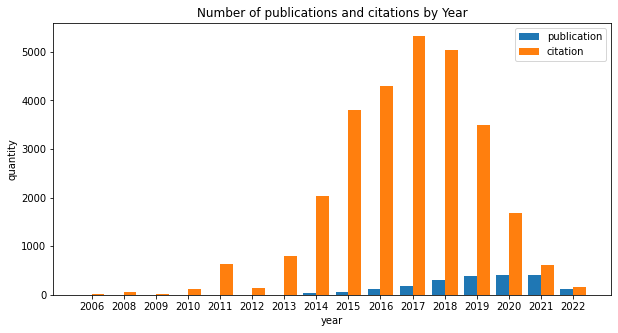

In [316]:
%matplotlib inline

x_axis = np.arange(len(pub.year))
width = 0.2
#bar1 = pub.groupby(by='Year').Year.count()
#bar2 = pub.groupby(by='Year', as_index = False).count()
plt.figure(figsize=(10, 5))
plt.bar(x_axis-width,pub[('Year','count')],width=0.4,label='publication')    
plt.bar(x_axis+width,pub[('Cited by','sum')],width=0.4,label='citation')    

plt.ylabel('quantity') 
plt.xlabel('year') 
plt.title("Number of publications and citations by Year")
plt.xticks(x_axis + width//2,['2006','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'])

plt.legend()
plt.show()

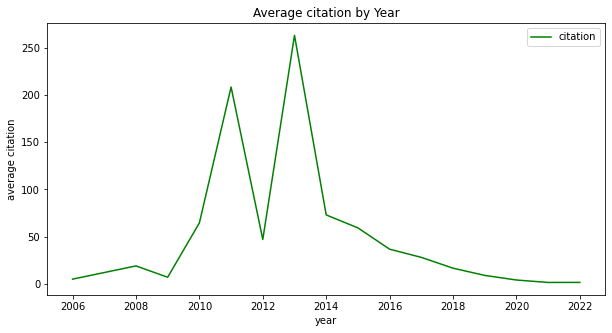

In [317]:
plt.figure(figsize=(10, 5))
plt.plot(pub[('year','')],pub[('Cited by','mean')],color='g', label = 'citation')

plt.title("Average citation by Year")
plt.ylabel('average citation') 
plt.xlabel('year')



plt.legend()
plt.show()

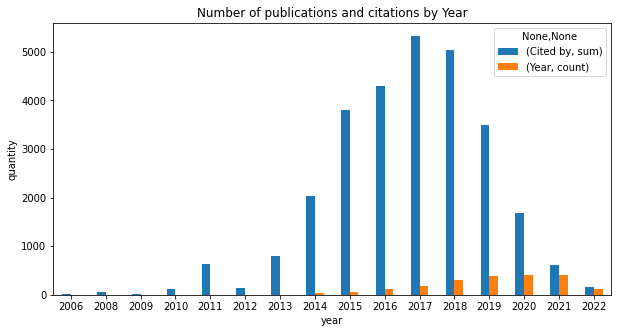

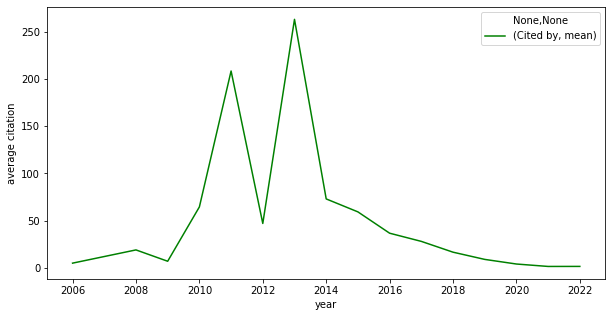

In [214]:
# df.plot(x=('year',''), y =[('Cited by','sum'),('Year', 'count')], kind= 'bar',figsize=(10,5), rot=0 )
# plt.ylabel('quantity') 
# plt.xlabel('year')
# plt.title("Number of publications and citations by Year")


# df.plot(x=('year',''), y =[('Cited by','mean')],figsize=(10,5),kind='line',style ='g')
# plt.ylabel('average citation') 
# plt.xlabel('year')
# plt.show()

### Correlation and Regression analysis

In [318]:
data.head(5)

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Document Type,Publication Stage,Open Access,Source,EID
0,"Han, G.-S., Li, Q., Li, Y.",35722113100; 57230992800; 57221627250,Nucleosome positioning based on DNA sequence e...,2022,BMC Genomics,23,NaN,301,NaN,NaN,NaN,NaN,10.1186/s12864-022-08508-6,https://www.scopus.com/inward/record.url?eid=2...,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85128126434
1,"Wang, B., Sun, Y., Chu, Y., Zhao, D., Yang, Z....",57558371300; 55737768100; 57191405659; 5720821...,Refining electronic medical records representa...,2022,BMC Bioinformatics,23,1,115,NaN,NaN,NaN,NaN,10.1186/s12859-022-04653-7,https://www.scopus.com/inward/record.url?eid=2...,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85127391608
2,"Hayawi, K., Mathew, S., Venugopal, N., Masud, ...",16238471000; 55039814800; 57515074500; 1403774...,DeeProBot: a hybrid deep neural network model ...,2022,Social Network Analysis and Mining,12,1,43,NaN,NaN,NaN,NaN,10.1007/s13278-022-00869-w,https://www.scopus.com/inward/record.url?eid=2...,Article,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-85126216374
3,"Sarkar, S., Bhagwat, A., Mukherjee, A.",57192075414; 57204817363; 57203731567,A core-periphery structure-based network embed...,2022,Social Network Analysis and Mining,12,1,32,NaN,NaN,NaN,NaN,10.1007/s13278-021-00749-9,https://www.scopus.com/inward/record.url?eid=2...,Article,Final,NaN,Scopus,2-s2.0-85124463772
4,"Perero-Codosero, J.M., Espinoza-Cuadros, F.M.,...",57216417919; 55536144400; 6701850865,X-vector anonymization using autoencoders and ...,2022,Computer Speech and Language,74,NaN,101351,NaN,NaN,NaN,NaN,10.1016/j.csl.2022.101351,https://www.scopus.com/inward/record.url?eid=2...,Article,Final,"All Open Access, Hybrid Gold",Scopus,2-s2.0-85123594307


In [319]:
cols = ['Year','Authors','Title','Cited by','Source title']
df = data[cols]
df['Cited by'] = df['Cited by'].fillna(0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [320]:
df

,Year,Authors,Title,Cited by,Source title
0,2022,"Han, G.-S., Li, Q., Li, Y.",Nucleosome positioning based on DNA sequence e...,0.0,BMC Genomics
1,2022,"Wang, B., Sun, Y., Chu, Y., Zhao, D., Yang, Z....",Refining electronic medical records representa...,0.0,BMC Bioinformatics
2,2022,"Hayawi, K., Mathew, S., Venugopal, N., Masud, ...",DeeProBot: a hybrid deep neural network model ...,0.0,Social Network Analysis and Mining
3,2022,"Sarkar, S., Bhagwat, A., Mukherjee, A.",A core-periphery structure-based network embed...,0.0,Social Network Analysis and Mining
4,2022,"Perero-Codosero, J.M., Espinoza-Cuadros, F.M.,...",X-vector anonymization using autoencoders and ...,0.0,Computer Speech and Language
...,...,...,...,...,...
2044,2008,"Kontorovich, L.(A.), Cortes, C., Mohri, M.",Kernel methods for learning languages,15.0,Theoretical Computer Science
2045,2008,"Tang, Y., Rose, R.",A study of using locality preserving projectio...,26.0,"ICASSP, IEEE International Conference on Acous..."
2046,2008,"Carter, K.M., Raich, R., Hero III, A.O.",Fine: Information embedding for document class...,16.0,"ICASSP, IEEE International Conference on Acous..."
2047,2006,"Kontorovich, L., Cortes, C., Mohri, M.",Learning linearly separable languages,6.0,Lecture Notes in Computer Science (including s...


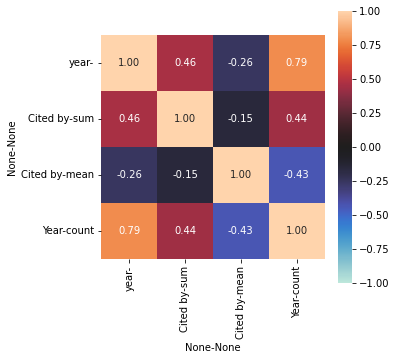

In [322]:
from dython.nominal import associations
complete_correlation= associations(pub, figsize=(5,5))


In [323]:
from sklearn.linear_model import LinearRegression

In [324]:
pub

year Cited by          Year
              sum    mean count
0   2006     10.0    5.00     2
1   2008     57.0   19.00     3
2   2009     14.0    7.00     2
3   2010    129.0   64.50     2
4   2011    625.0  208.33     3
5   2012    141.0   47.00     3
6   2013    789.0  263.00     3
7   2014   2043.0   72.96    28
8   2015   3792.0   59.25    64
9   2016   4293.0   36.69   117
10  2017   5326.0   28.03   190
11  2018   5047.0   16.60   304
12  2019   3487.0    8.96   389
13  2020   1689.0    4.07   415
14  2021    623.0    1.50   414
15  2022    170.0    1.55   110

In [328]:
pub['time'] = pub['year'].apply(lambda x: x/1000)
pub['time_x2'] = pub['time'].apply(lambda x: x**2)

In [329]:
pub

year Cited by          Year   time   time_x2
              sum    mean count                 
0   2006     10.0    5.00     2  2.006  4.024036
1   2008     57.0   19.00     3  2.008  4.032064
2   2009     14.0    7.00     2  2.009  4.036081
3   2010    129.0   64.50     2  2.010  4.040100
4   2011    625.0  208.33     3  2.011  4.044121
5   2012    141.0   47.00     3  2.012  4.048144
6   2013    789.0  263.00     3  2.013  4.052169
7   2014   2043.0   72.96    28  2.014  4.056196
8   2015   3792.0   59.25    64  2.015  4.060225
9   2016   4293.0   36.69   117  2.016  4.064256
10  2017   5326.0   28.03   190  2.017  4.068289
11  2018   5047.0   16.60   304  2.018  4.072324
12  2019   3487.0    8.96   389  2.019  4.076361
13  2020   1689.0    4.07   415  2.020  4.080400
14  2021    623.0    1.50   414  2.021  4.084441
15  2022    170.0    1.55   110  2.022  4.088484

In [335]:
x = pub[['time','time_x2']]
y = pub[('Year','count')]

In [336]:
# with sklearn
# .values.reshape((-1, 1))
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [337]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 4943336.979708934
Coefficients: 
 [-4934456.32043969  1231387.06701812]


In [347]:
r_sq = regr.score(x,y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6513741463146439


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


### Top journals

In [350]:
df

,Year,Authors,Title,Cited by,Source title
0,2022,"Han, G.-S., Li, Q., Li, Y.",Nucleosome positioning based on DNA sequence e...,0.0,BMC Genomics
1,2022,"Wang, B., Sun, Y., Chu, Y., Zhao, D., Yang, Z....",Refining electronic medical records representa...,0.0,BMC Bioinformatics
2,2022,"Hayawi, K., Mathew, S., Venugopal, N., Masud, ...",DeeProBot: a hybrid deep neural network model ...,0.0,Social Network Analysis and Mining
3,2022,"Sarkar, S., Bhagwat, A., Mukherjee, A.",A core-periphery structure-based network embed...,0.0,Social Network Analysis and Mining
4,2022,"Perero-Codosero, J.M., Espinoza-Cuadros, F.M.,...",X-vector anonymization using autoencoders and ...,0.0,Computer Speech and Language
...,...,...,...,...,...
2044,2008,"Kontorovich, L.(A.), Cortes, C., Mohri, M.",Kernel methods for learning languages,15.0,Theoretical Computer Science
2045,2008,"Tang, Y., Rose, R.",A study of using locality preserving projectio...,26.0,"ICASSP, IEEE International Conference on Acous..."
2046,2008,"Carter, K.M., Raich, R., Hero III, A.O.",Fine: Information embedding for document class...,16.0,"ICASSP, IEEE International Conference on Acous..."
2047,2006,"Kontorovich, L., Cortes, C., Mohri, M.",Learning linearly separable languages,6.0,Lecture Notes in Computer Science (including s...


In [351]:
df['Source title'].value_counts()

Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)    153
IEEE Access                                                                                                                              64
CEUR Workshop Proceedings                                                                                                                62
ACM International Conference Proceeding Series                                                                                           54
Communications in Computer and Information Science                                                                                       39
                                                                                                                                       ... 
Zhejiang Daxue Xuebao (Gongxue Ban)/Journal of Zhejiang University (Engineering Science)                                                  1
Kexue Tongbao/Chines

In [361]:
top_journal = df.groupby('Source title').agg({'Source title':'count','Cited by':['sum','mean']}).sort_values([('Source title','count')],ascending=False)
top_journal = top_journal.apply(lambda x: round(x,2))                                                                                                
                                                                                                
                                                                                                                                                                                                                                                                                   

In [362]:
top_journal_11 = top_journal.iloc[:11,:]

In [363]:
top_journal_11

Source title Cited by  \
                                                          count      sum   
Source title                                                               
Lecture Notes in Computer Science (including su...          153    782.0   
IEEE Access                                                  64    795.0   
CEUR Workshop Proceedings                                    62    211.0   
ACM International Conference Proceeding Series               54    109.0   
Communications in Computer and Information Science           39     61.0   
Advances in Intelligent Systems and Computing                33     96.0   
Knowledge-Based Systems                                      19    911.0   
Journal of Biomedical Informatics                            18    470.0   
IJCAI International Joint Conference on Artific...           16    539.0   
Applied Sciences (Switzerland)                               16     92.0   
Proceedings of the International Joint Conferen...           15    178.0   

                                                           
                                                     mean  
Source title                                               
Lecture Notes in Computer Science (including su...   5.11  
IEEE Access                                         12.42  
CEUR Workshop Proceedings                            3.40  
ACM International Conference Proceeding Series       2.02  
Communications in Computer and Information Science   1.56  
Advances in Intelligent Systems and Computing        2.91  
Knowledge-Based Systems                             47.95  
Journal of Biomedical Informatics                   26.11  
IJCAI International Joint Conference on Artific...  33.69  
Applied Sciences (Switzerland)                       5.75  
Proceedings of the International Joint Conferen...  11.87

In [366]:
top_journal_11.rename(columns={('Source title','count'):'TP',('Cited by','sum'):'TC',('Cited by','mean'):'ACP'})

Source title Cited by  \
                                                          count      sum   
Source title                                                               
Lecture Notes in Computer Science (including su...          153    782.0   
IEEE Access                                                  64    795.0   
CEUR Workshop Proceedings                                    62    211.0   
ACM International Conference Proceeding Series               54    109.0   
Communications in Computer and Information Science           39     61.0   
Advances in Intelligent Systems and Computing                33     96.0   
Knowledge-Based Systems                                      19    911.0   
Journal of Biomedical Informatics                            18    470.0   
IJCAI International Joint Conference on Artific...           16    539.0   
Applied Sciences (Switzerland)                               16     92.0   
Proceedings of the International Joint Conferen...           15    178.0   

                                                           
                                                     mean  
Source title                                               
Lecture Notes in Computer Science (including su...   5.11  
IEEE Access                                         12.42  
CEUR Workshop Proceedings                            3.40  
ACM International Conference Proceeding Series       2.02  
Communications in Computer and Information Science   1.56  
Advances in Intelligent Systems and Computing        2.91  
Knowledge-Based Systems                             47.95  
Journal of Biomedical Informatics                   26.11  
IJCAI International Joint Conference on Artific...  33.69  
Applied Sciences (Switzerland)                       5.75  
Proceedings of the International Joint Conferen...  11.87

### Influential publications

In [368]:
df

,Year,Authors,Title,Cited by,Source title
0,2022,"Han, G.-S., Li, Q., Li, Y.",Nucleosome positioning based on DNA sequence e...,0.0,BMC Genomics
1,2022,"Wang, B., Sun, Y., Chu, Y., Zhao, D., Yang, Z....",Refining electronic medical records representa...,0.0,BMC Bioinformatics
2,2022,"Hayawi, K., Mathew, S., Venugopal, N., Masud, ...",DeeProBot: a hybrid deep neural network model ...,0.0,Social Network Analysis and Mining
3,2022,"Sarkar, S., Bhagwat, A., Mukherjee, A.",A core-periphery structure-based network embed...,0.0,Social Network Analysis and Mining
4,2022,"Perero-Codosero, J.M., Espinoza-Cuadros, F.M.,...",X-vector anonymization using autoencoders and ...,0.0,Computer Speech and Language
...,...,...,...,...,...
2044,2008,"Kontorovich, L.(A.), Cortes, C., Mohri, M.",Kernel methods for learning languages,15.0,Theoretical Computer Science
2045,2008,"Tang, Y., Rose, R.",A study of using locality preserving projectio...,26.0,"ICASSP, IEEE International Conference on Acous..."
2046,2008,"Carter, K.M., Raich, R., Hero III, A.O.",Fine: Information embedding for document class...,16.0,"ICASSP, IEEE International Conference on Acous..."
2047,2006,"Kontorovich, L., Cortes, C., Mohri, M.",Learning linearly separable languages,6.0,Lecture Notes in Computer Science (including s...


In [378]:
inf_pub = df.groupby(['Title','Authors','Year']).agg({'Cited by':['sum']}).sort_values([('Cited by','sum')],ascending=False)
inf_pub_23 = inf_pub.head(23)


In [379]:
inf_pub

,,,Cited by
,,,sum
Title,Authors,Year,
Supervised learning of universal sentence representations from natural language inference data,"Conneau, A., Kiela, D., Schwenk, H., Barrault, L., Bordes, A.",2017,909.0
Learning sentiment-specific word embedding for twitter sentiment classification,"Tang, D., Wei, F., Yang, N., Zhou, M., Liu, T., Qin, B.",2014,837.0
Zero-shot learning through cross-modal transfer,"Socher, R., Ganjoo, M., Manning, C.D., Ng, A.Y.",2013,743.0
"Graph embedding techniques, applications, and performance: A survey","Goyal, P., Ferrara, E.",2018,698.0
Man is to computer programmer as woman is to homemaker? Debiasing word embeddings,"Bolukbasi, T., Chang, K.-W., Zou, J., Saligrama, V., Kalai, A.",2016,658.0
...,...,...,...
Early Detection of Severe Flu Outbreaks using Contextual Word Embeddings,"Karsi, R., Zaim, M., Alami, J.E.",2021,0.0
Reduced Variable Neighbourhood Search for the Generation of Controlled Circular Data,"Consoli, S., Perrotta, D., Turchi, M.",2021,0.0


In [380]:
inf_pub[('Cited by','sum')].value_counts()

0.0      627
1.0      293
2.0      173
3.0      118
4.0       96
        ... 
123.0      1
125.0      1
130.0      1
131.0      1
74.0       1
Name: (Cited by, sum), Length: 129, dtype: int64

In [392]:
more_20 = inf_pub[inf_pub[('Cited by','sum')] > 20].count()
more_50 = inf_pub[inf_pub[('Cited by','sum')] > 50].count()
more_100 = inf_pub[inf_pub[('Cited by','sum')] > 100].count()
print('There are {} articles with more than 20 citations'.format(more_20[0]))
print('There are {} articles with more than 50 citations'.format(more_50[0]))
print('There are {} articles with more than 100 citations'.format(more_100[0]))

There are 256 articles with more than 20 citations
There are 112 articles with more than 50 citations
There are 56 articles with more than 100 citations
